In [1]:
import torch
from net import Net  # Importez la classe Net depuis votre fichier net.py
import torchvision.transforms as transforms
from PIL import Image

from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Charger votre modèle pré-entraîné
model = Net()
model.load_state_dict(torch.load('model_new_archi.pth'))
model.eval()

# Définir vos transformations pour les régions de la fenêtre
transform = transforms.Compose([
    transforms.Grayscale(),
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.5,), std=(0.5,)),
])

# Charger votre image (à remplacer par l'image sur laquelle vous voulez effectuer la détection)
image = Image.open('images_sliding_window/image_visages.jpg')

# Spécifier la taille de la fenêtre et le chevauchement (par défaut à 50%)
window_size = 36
overlap = 0.5

# Convertir l'image en tenseur
image_tensor = transform(image)

# Obtenir les dimensions de l'image
img_width, img_height = image.size

print ("Image size: ", image.size)
print ("Window size: ", window_size)
print ("Overlap: ", overlap)

Image size:  (853, 452)
Window size:  36
Overlap:  0.5


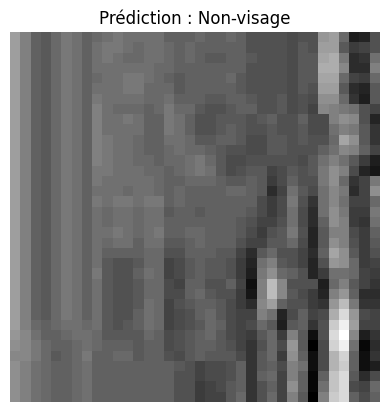

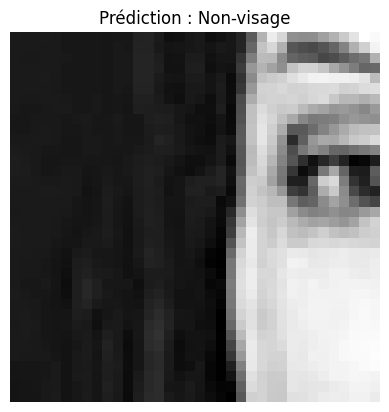

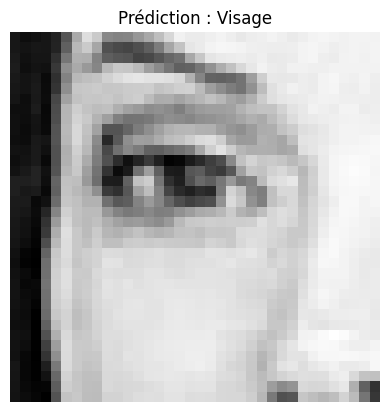

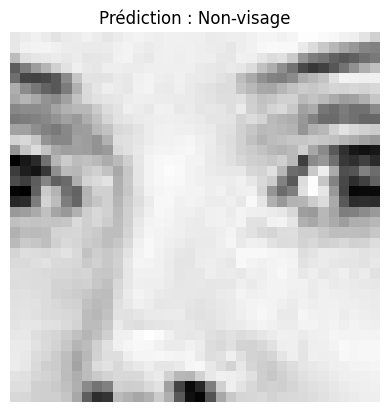

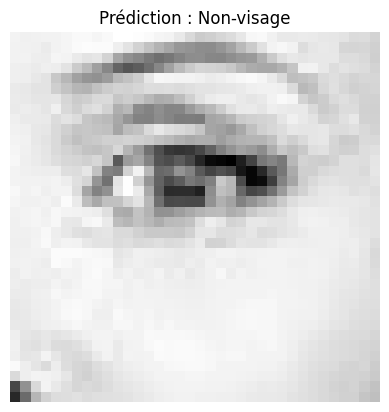

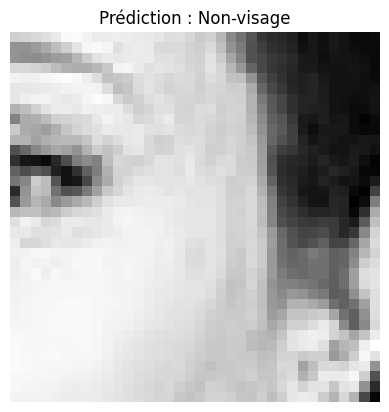

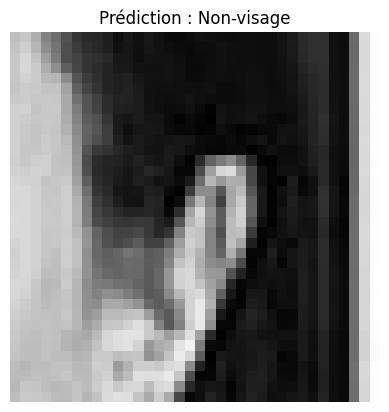

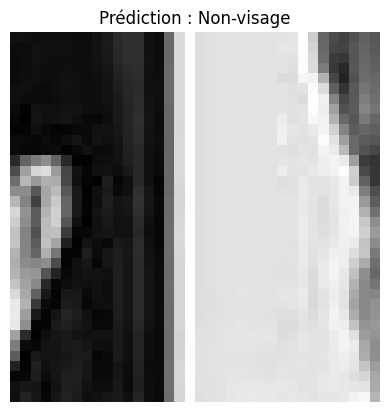

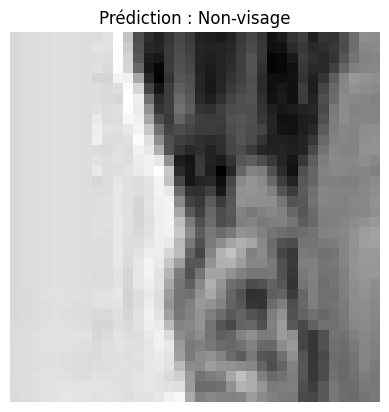

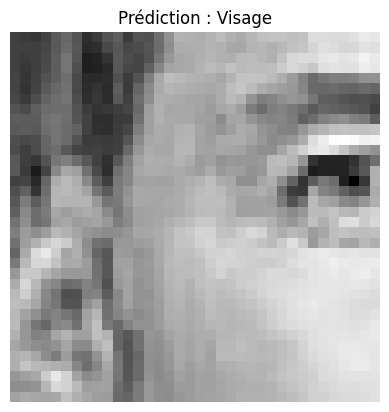

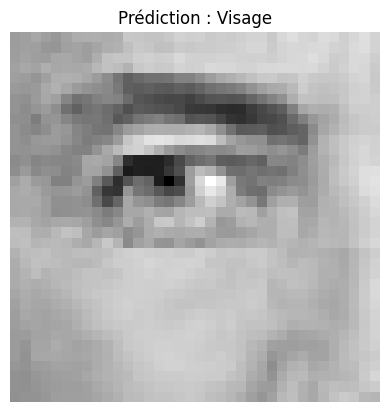

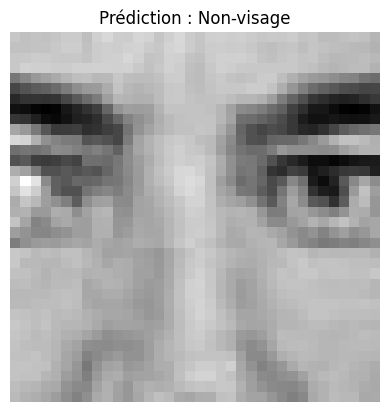

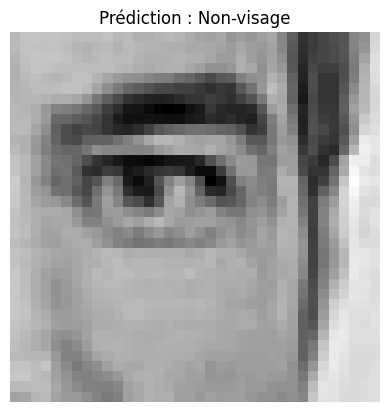

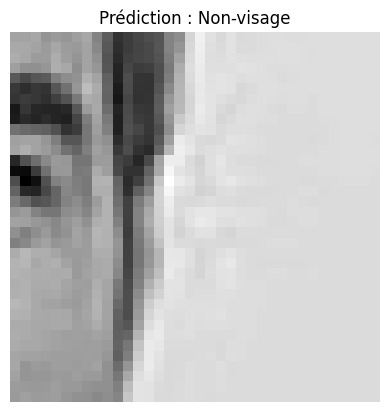

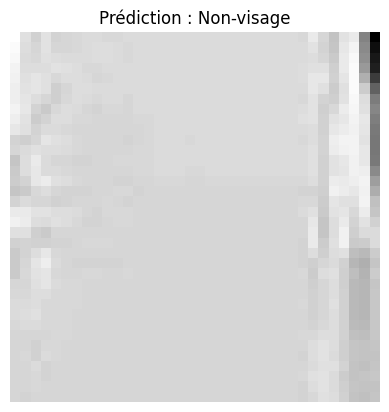

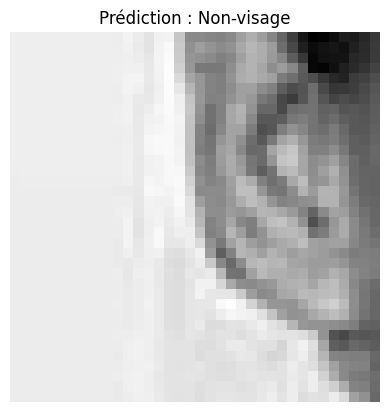

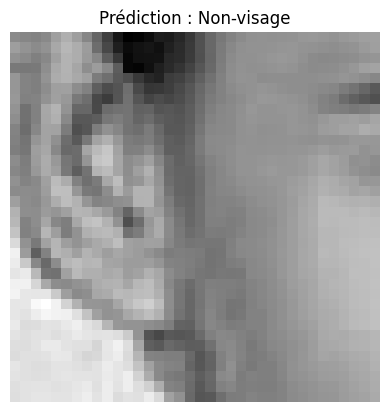

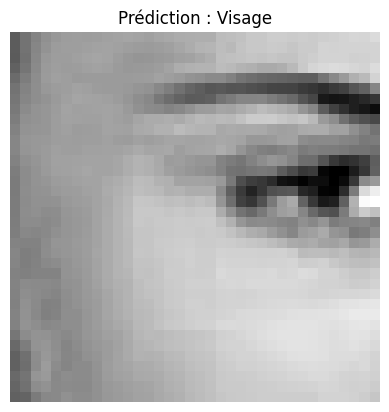

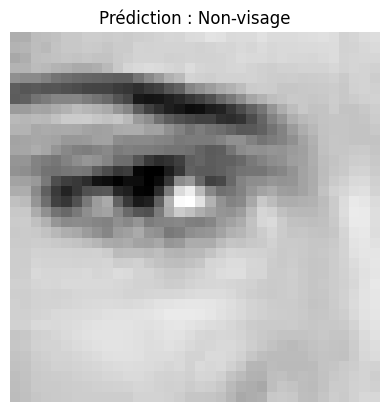

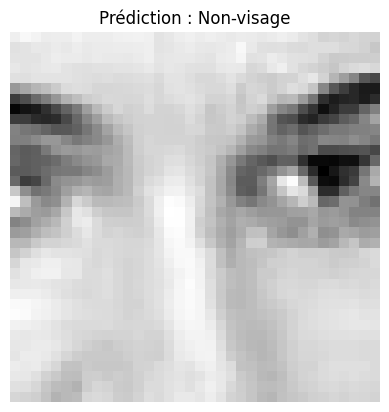

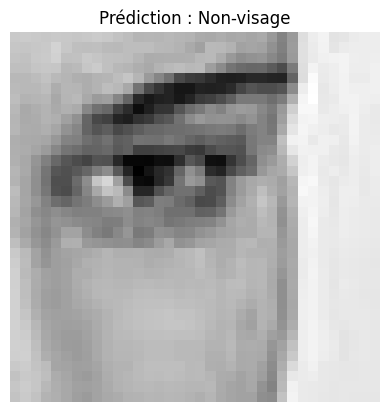

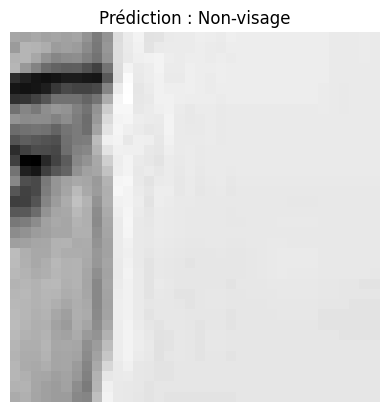

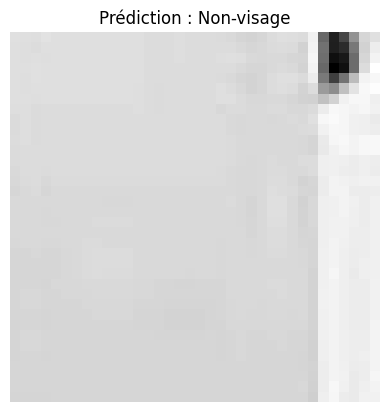

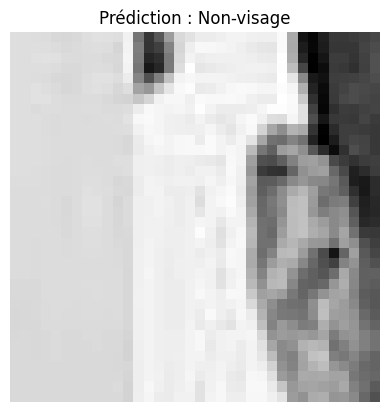

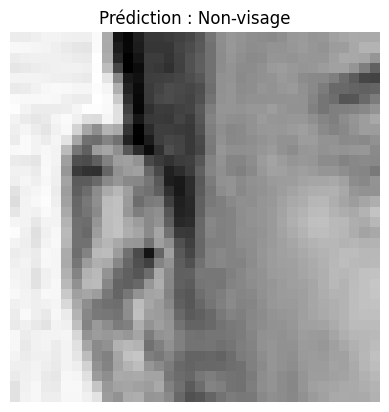

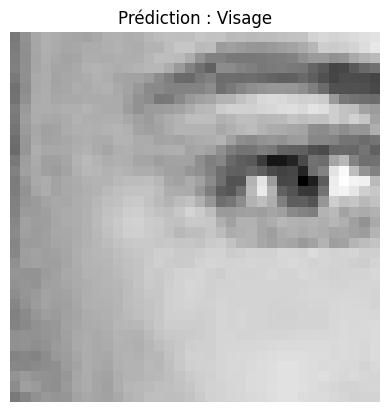

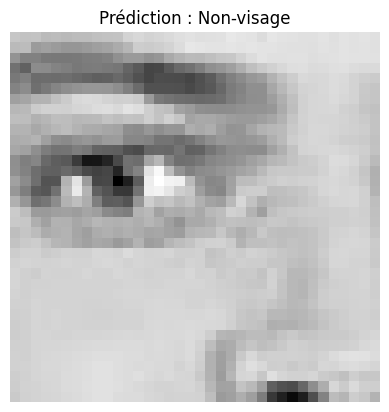

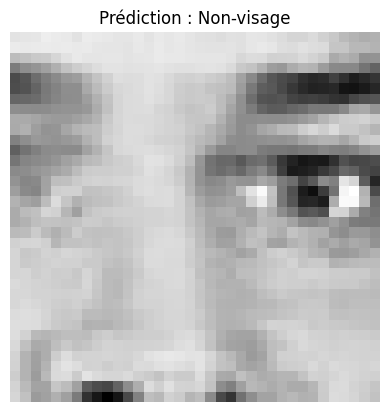

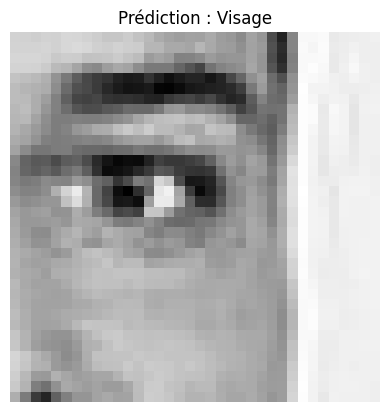

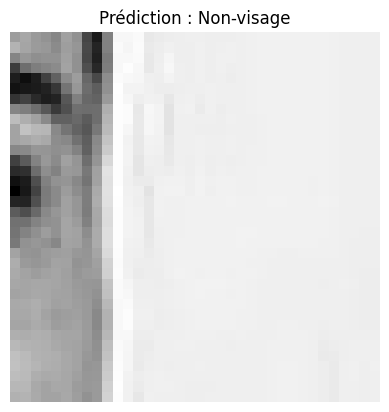

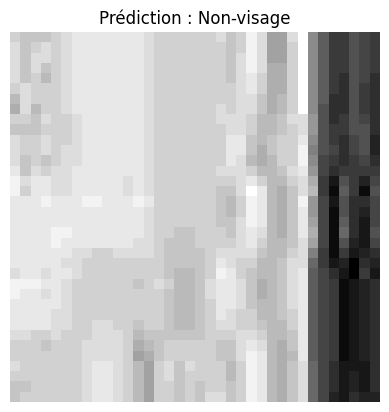

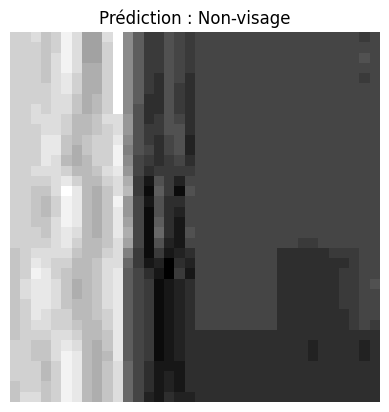

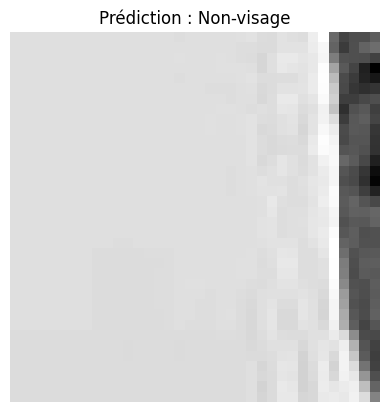

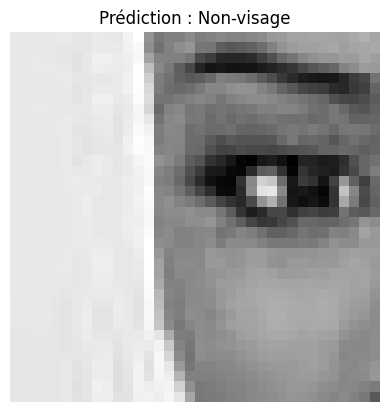

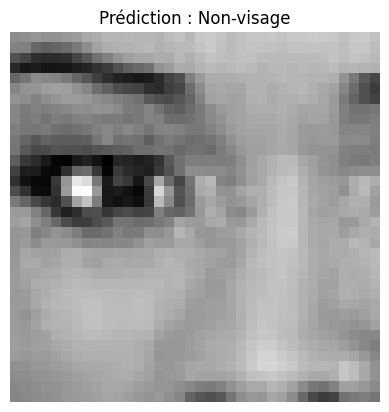

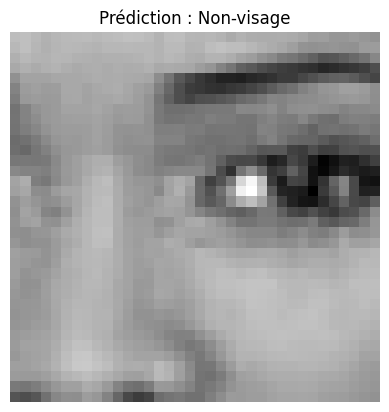

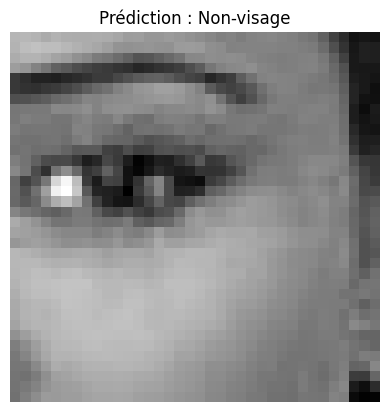

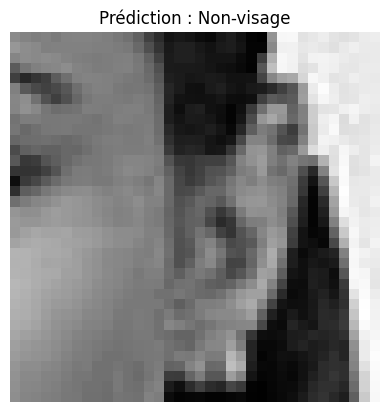

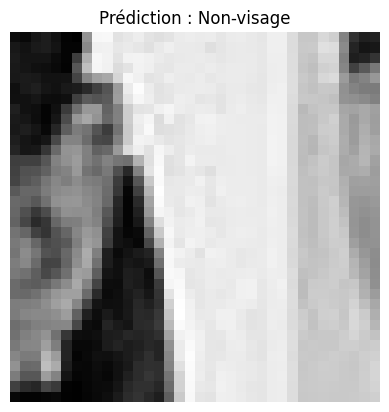

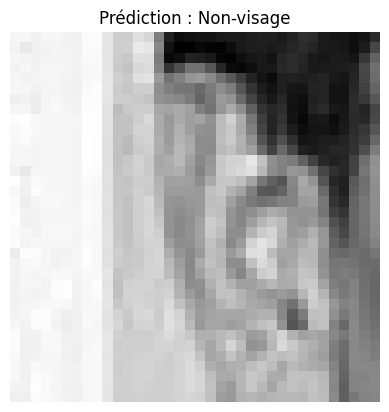

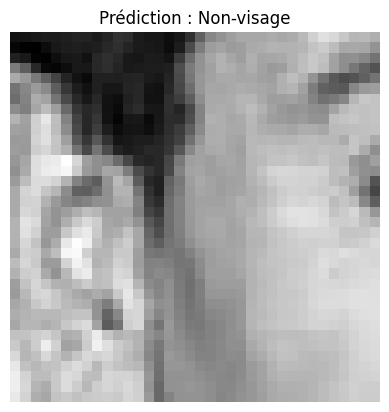

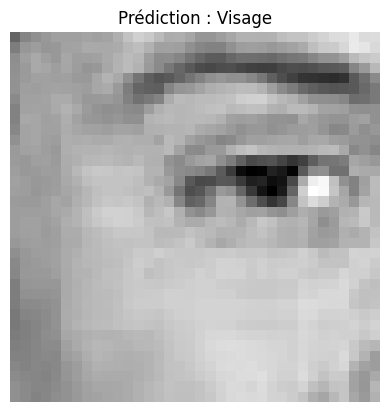

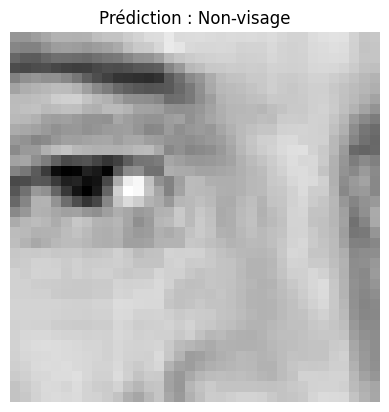

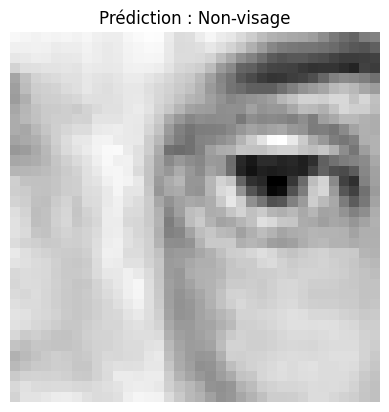

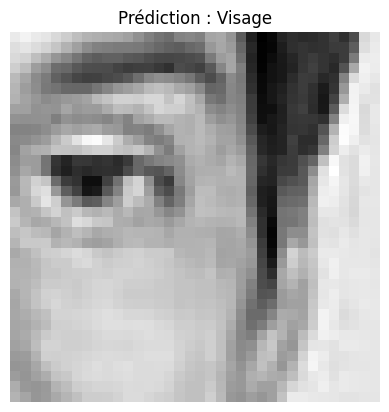

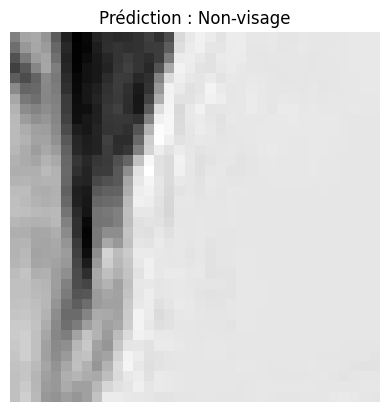

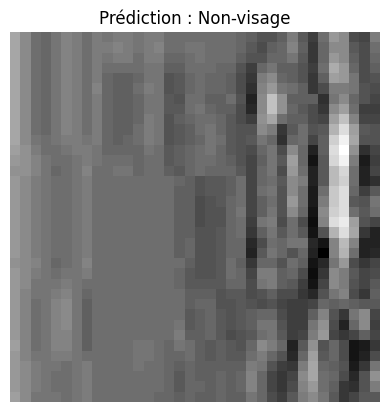

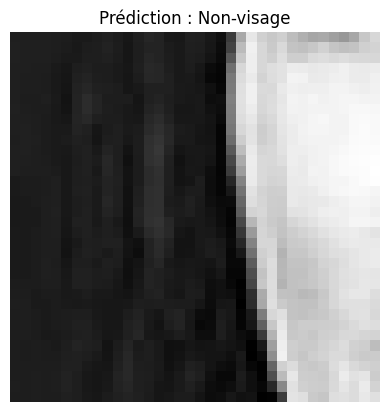

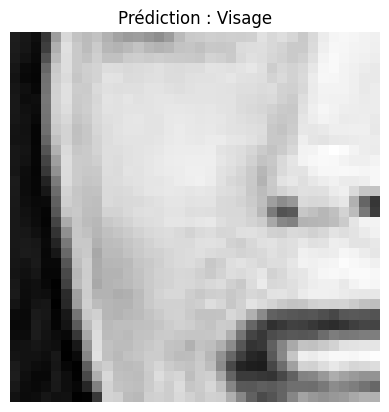

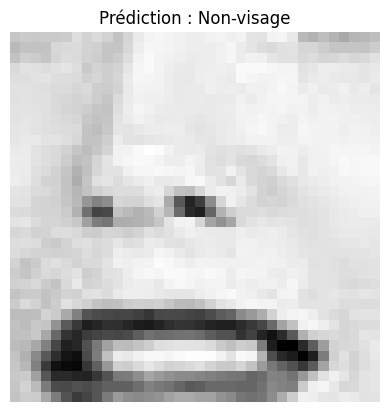

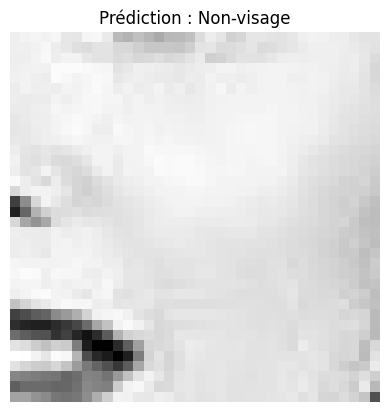

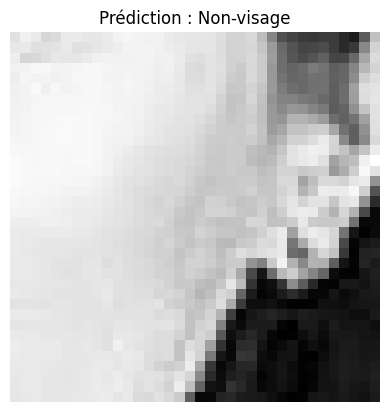

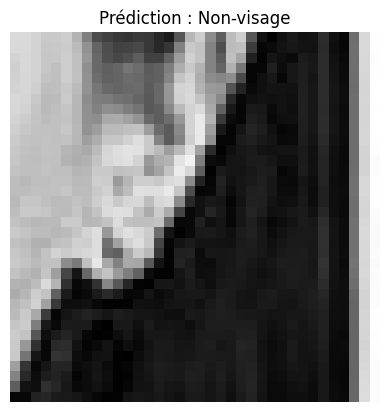

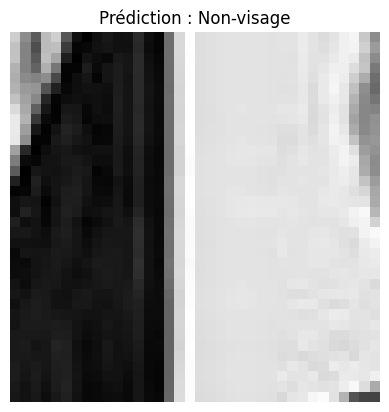

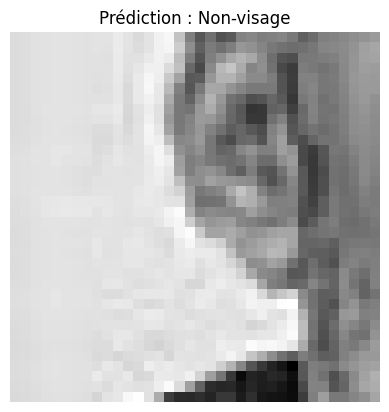

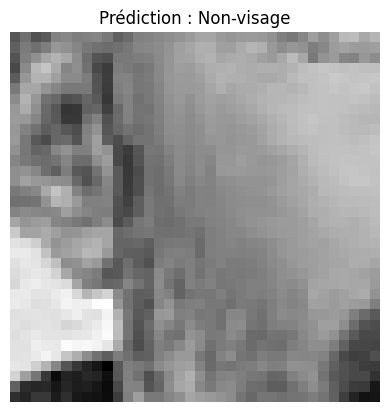

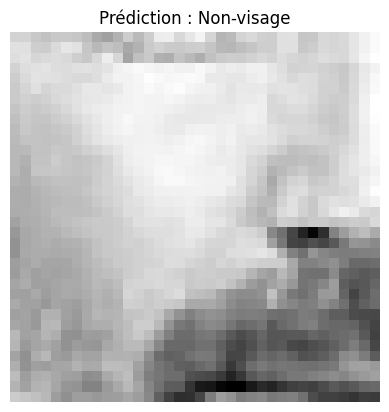

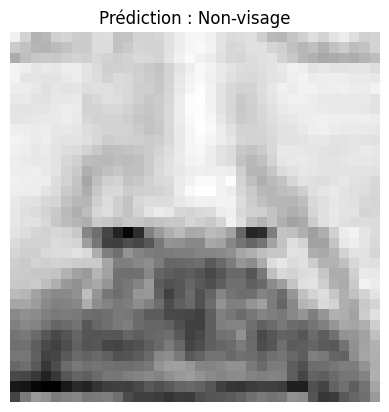

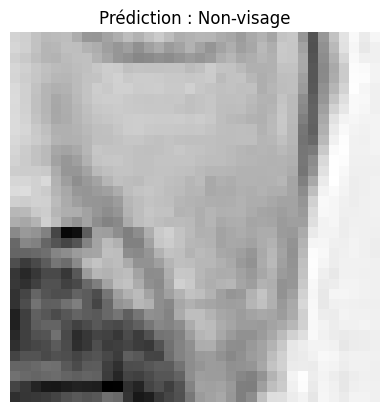

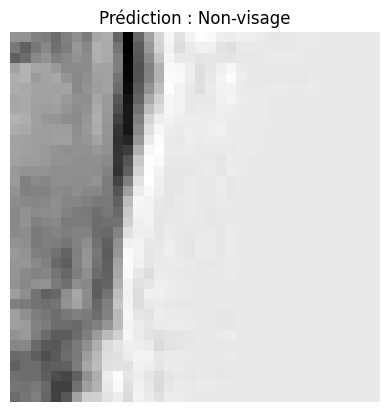

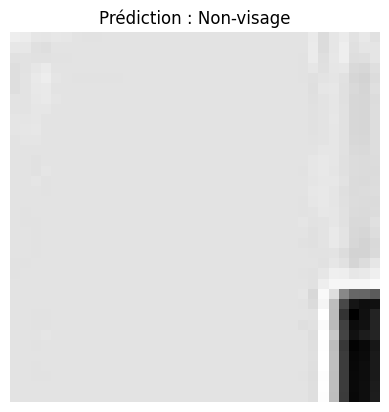

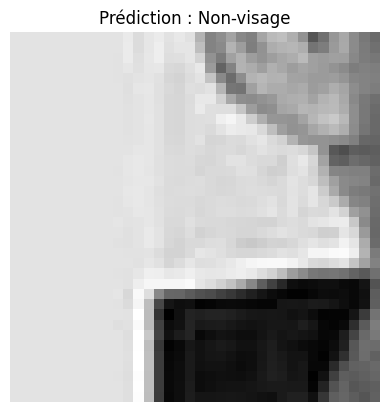

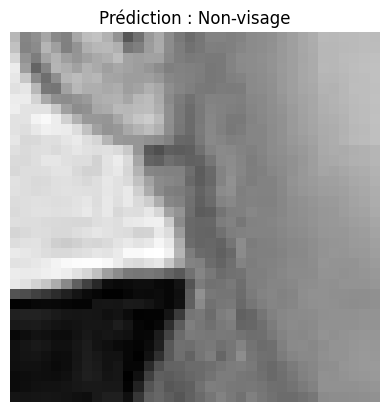

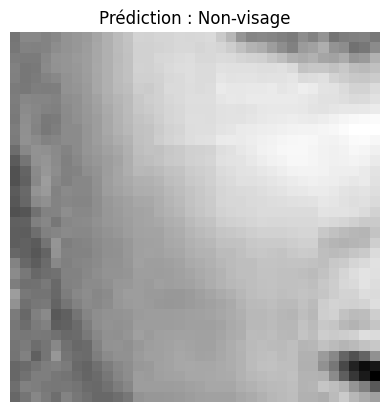

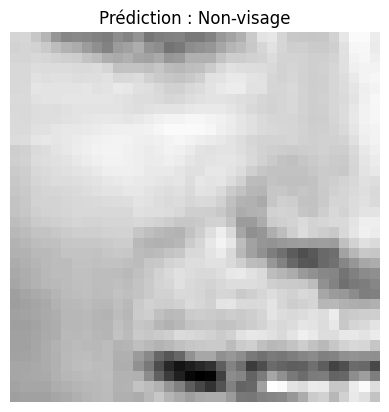

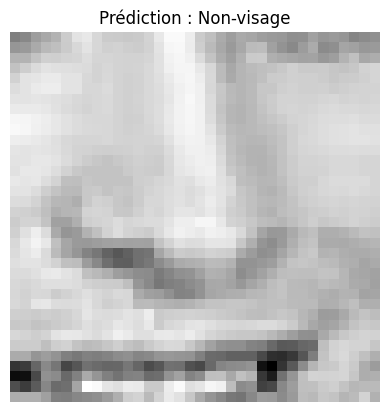

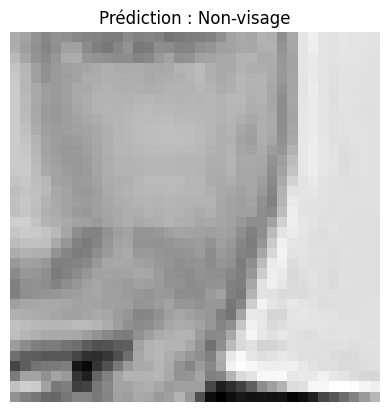

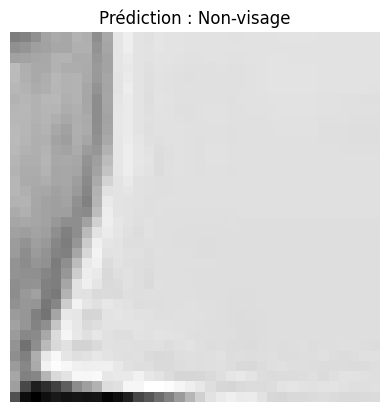

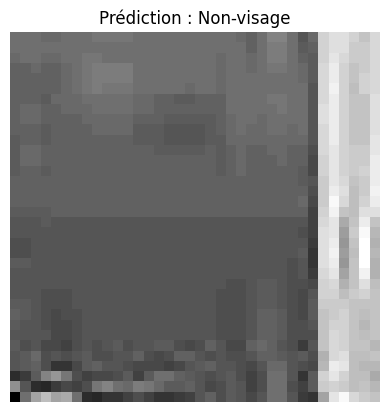

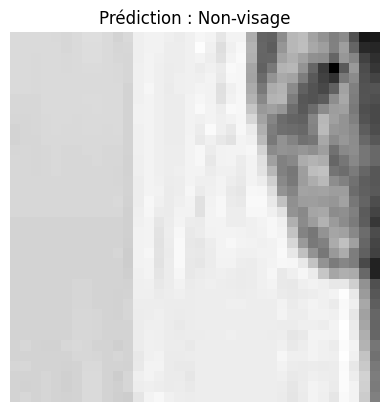

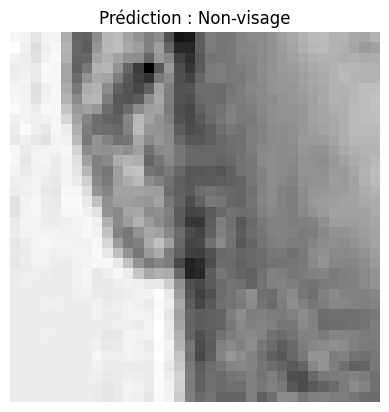

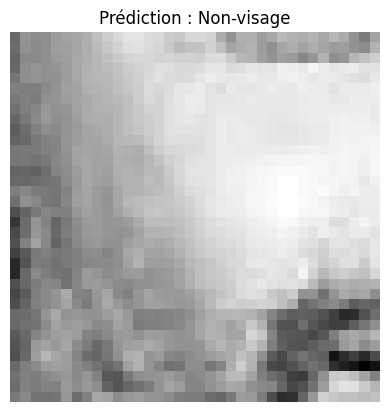

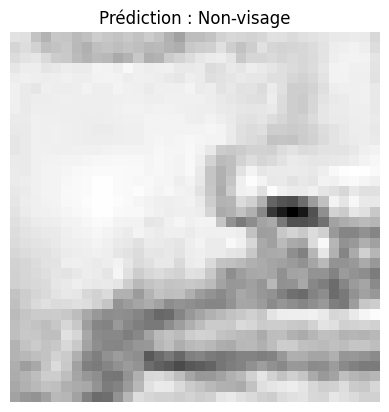

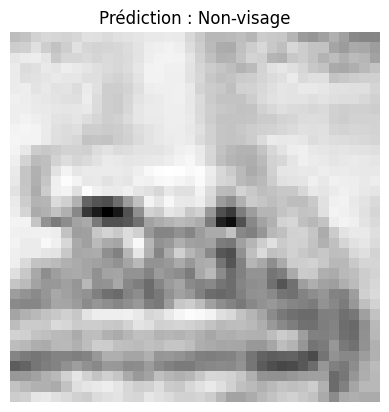

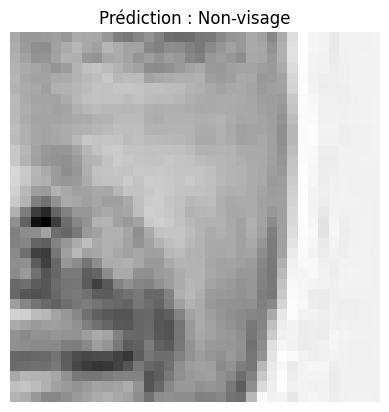

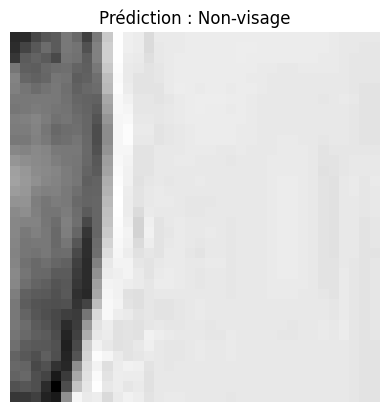

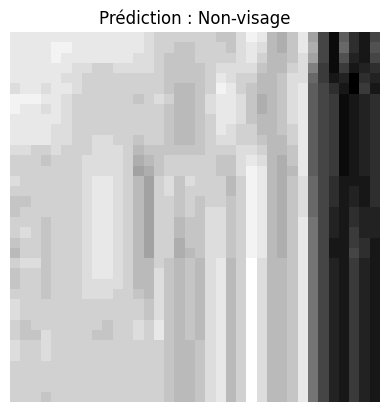

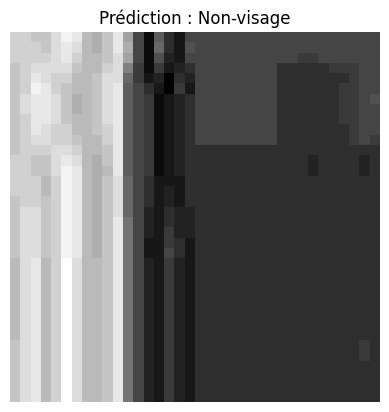

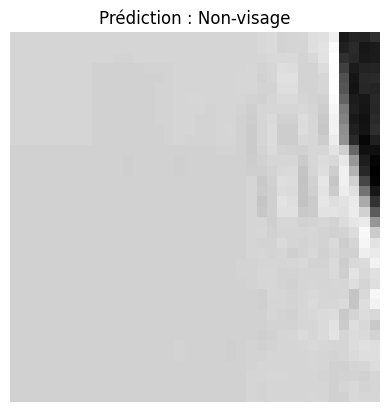

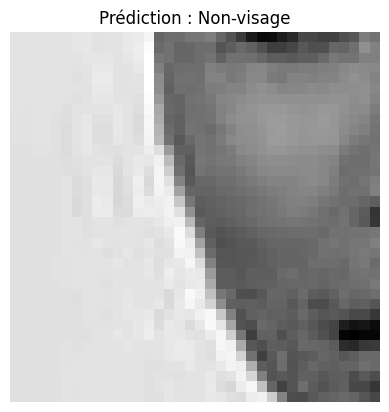

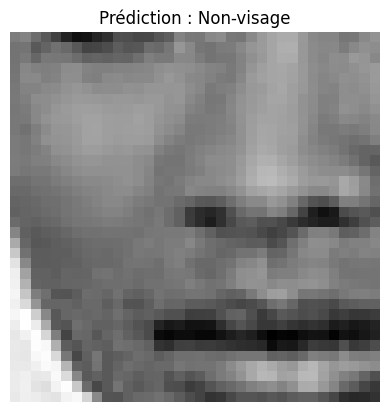

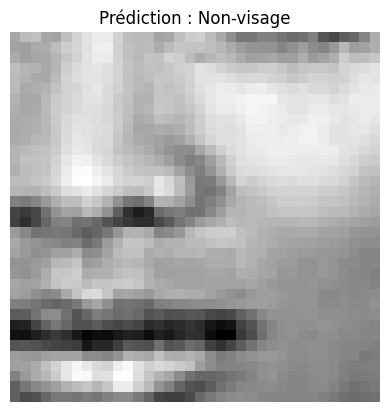

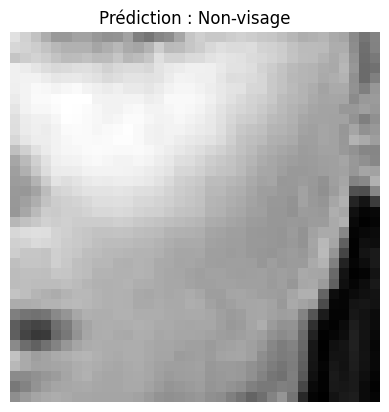

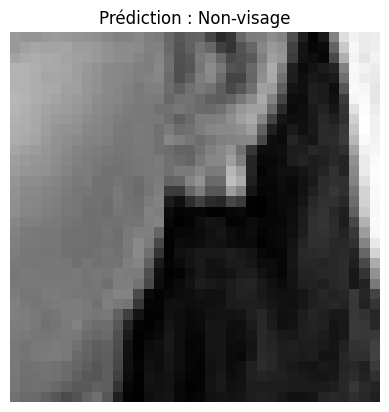

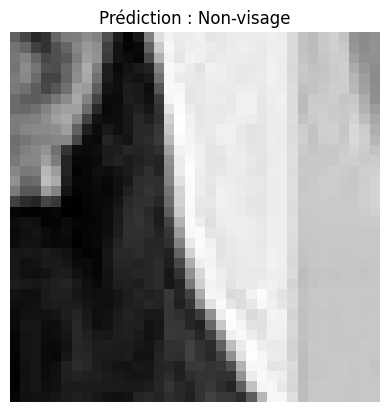

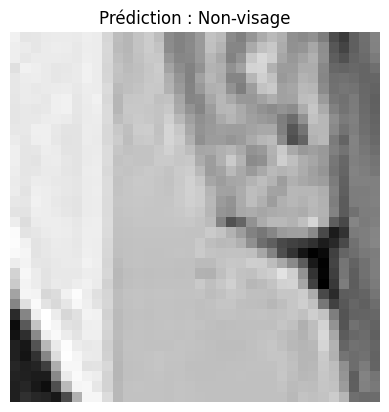

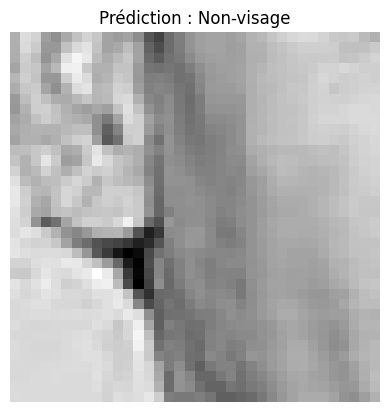

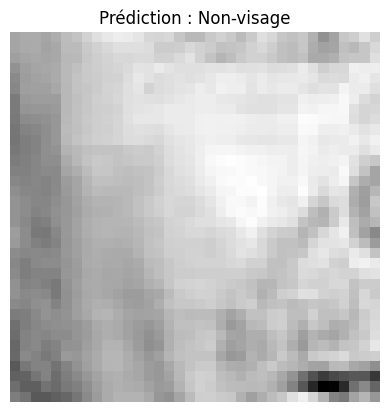

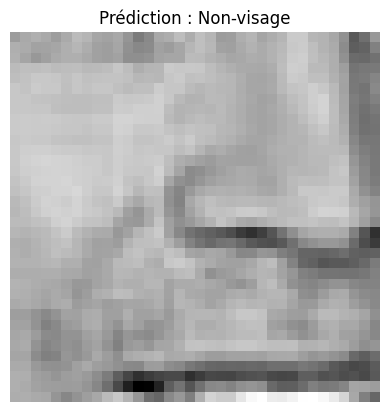

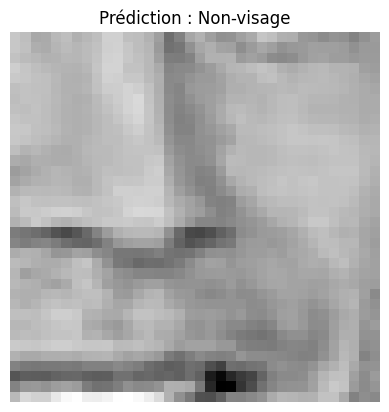

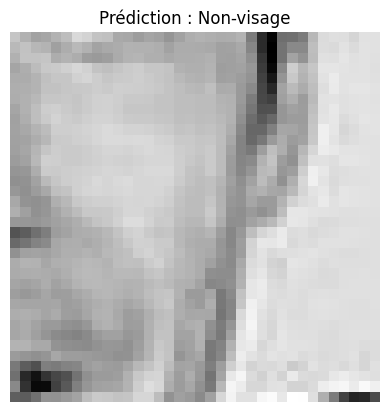

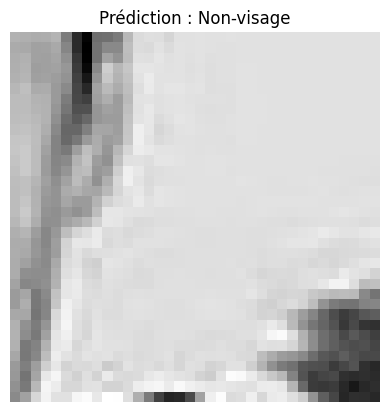

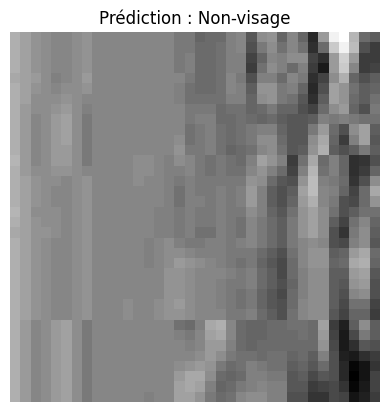

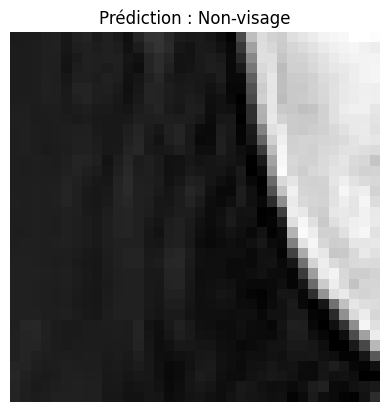

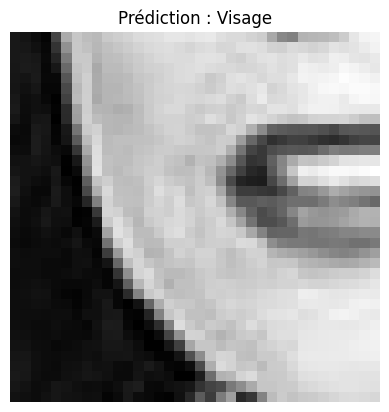

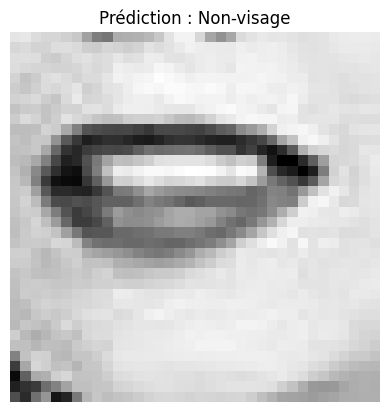

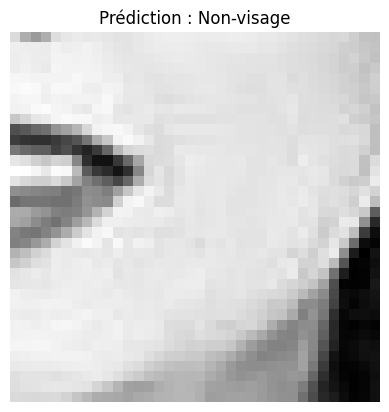

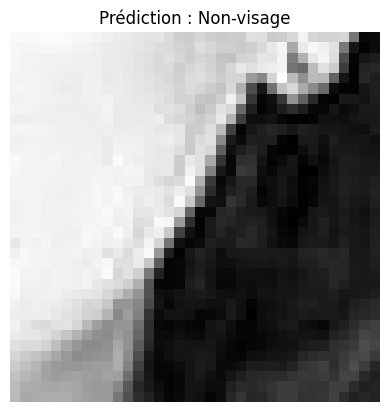

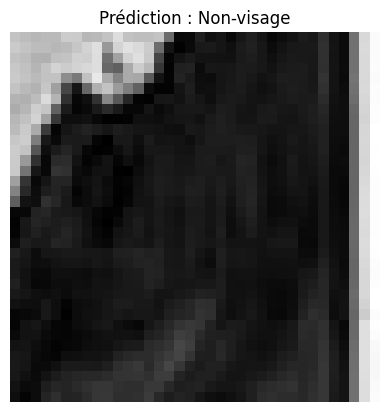

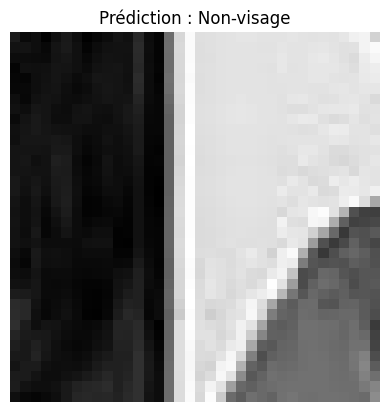

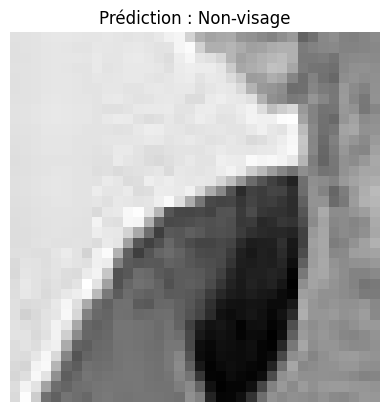

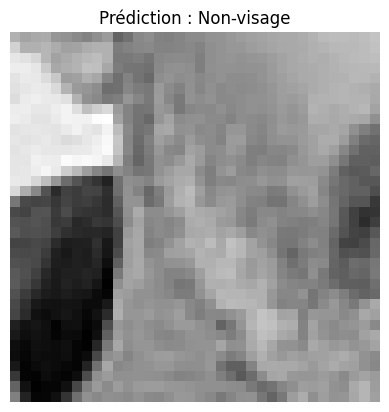

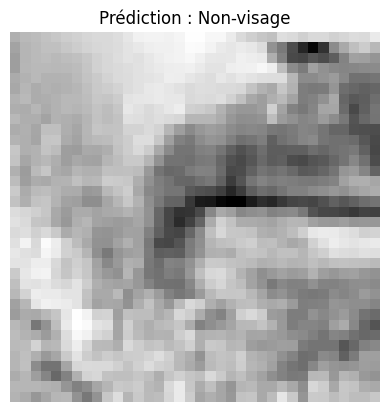

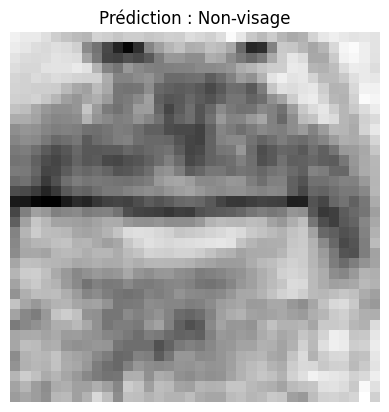

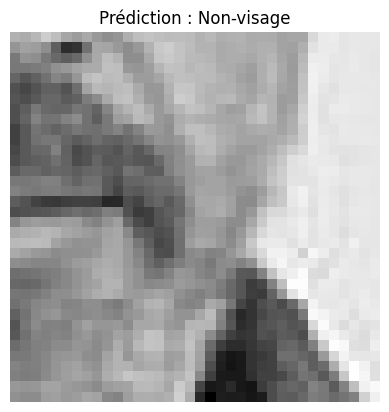

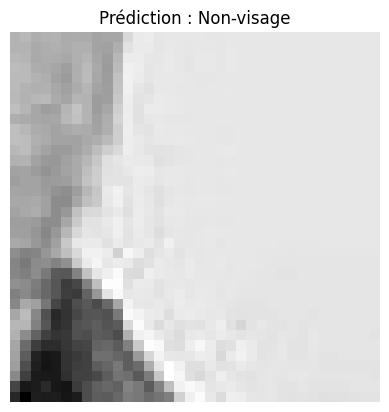

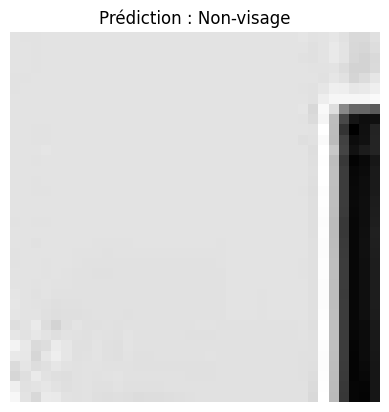

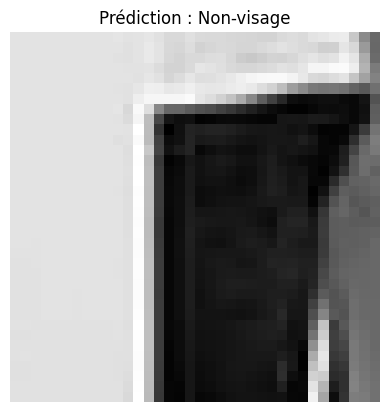

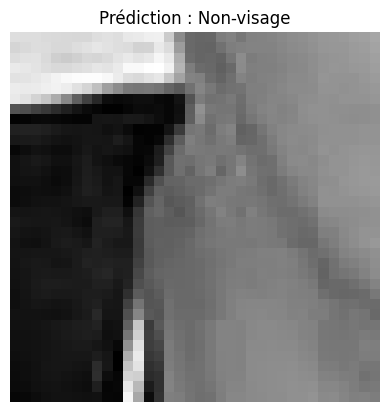

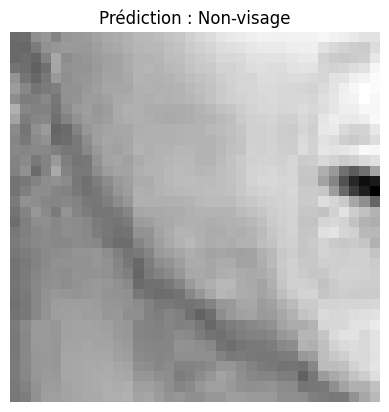

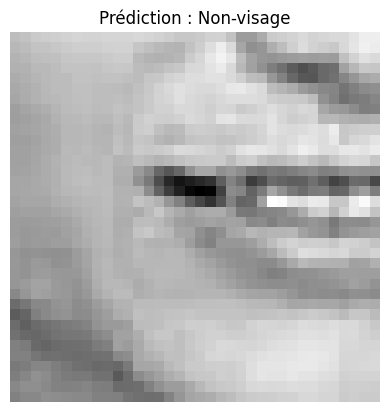

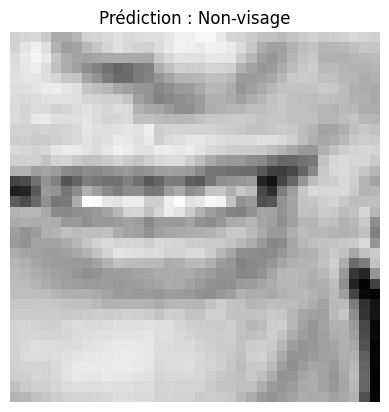

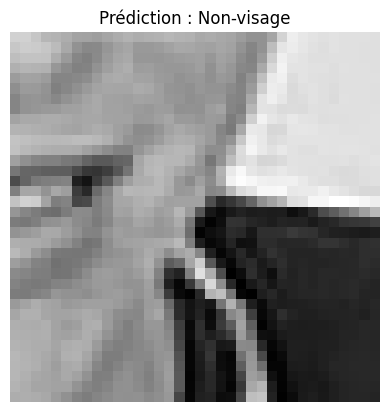

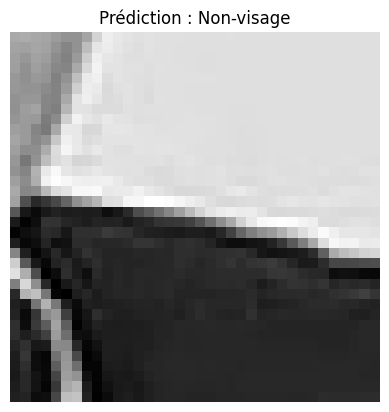

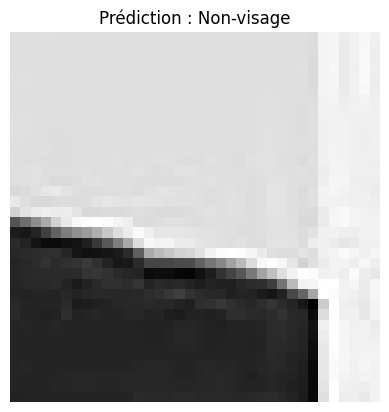

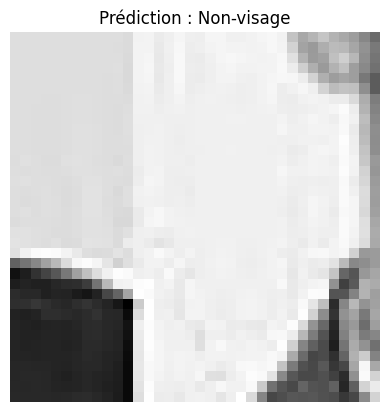

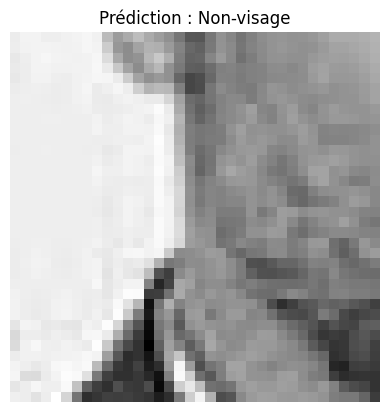

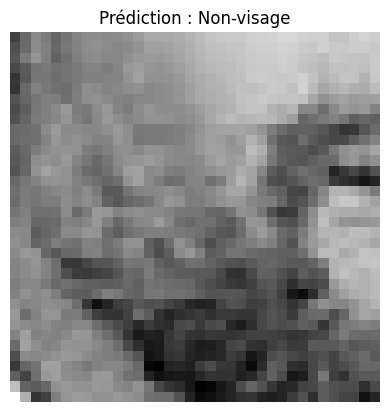

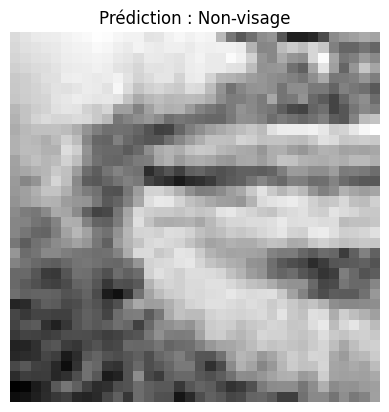

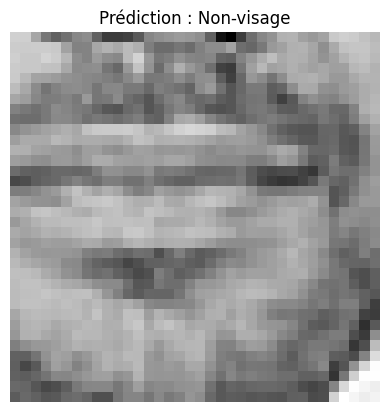

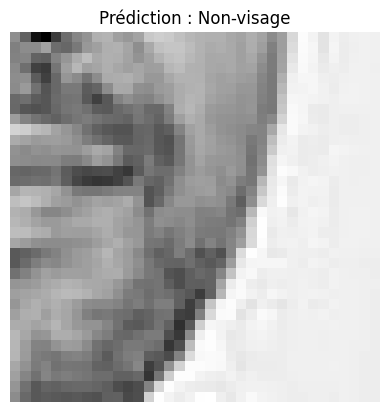

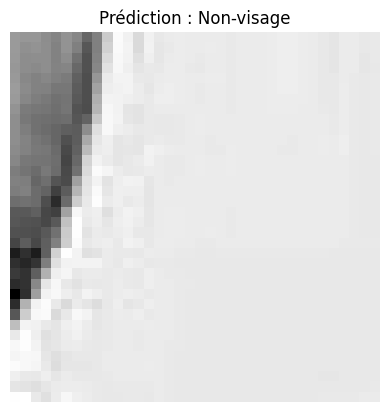

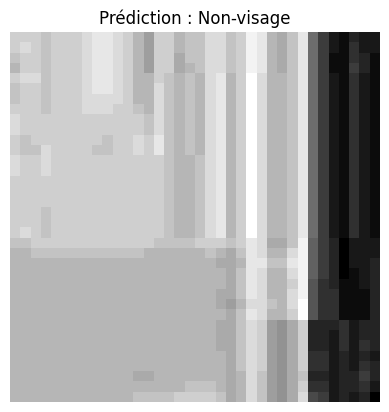

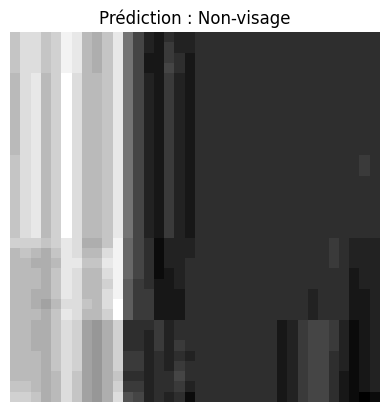

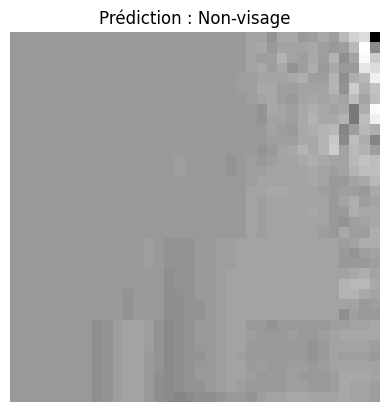

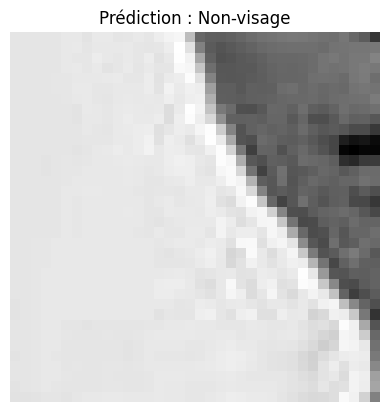

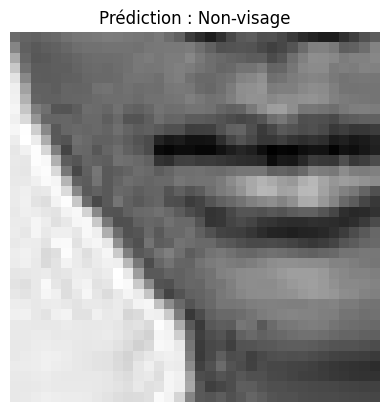

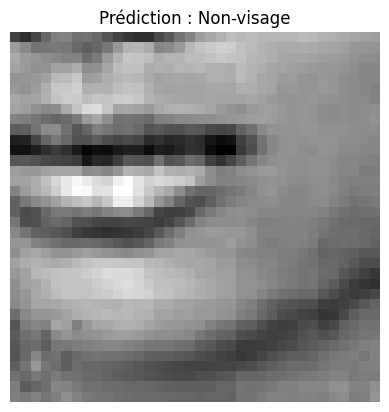

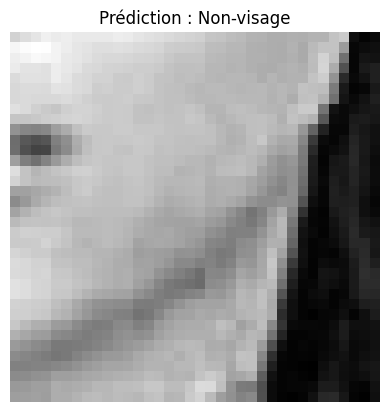

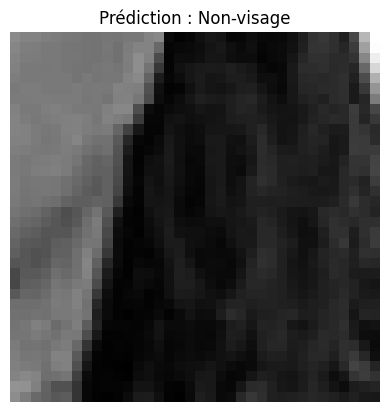

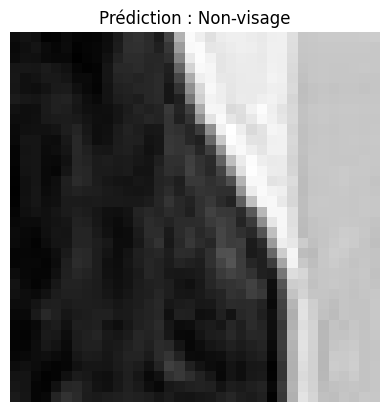

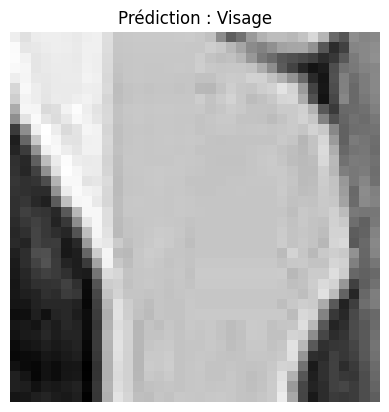

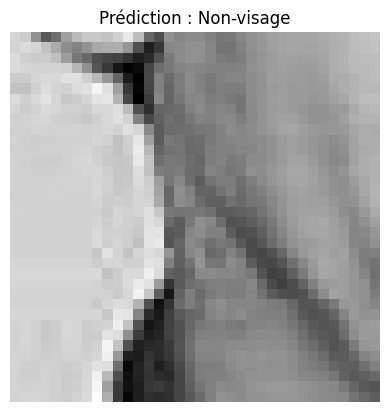

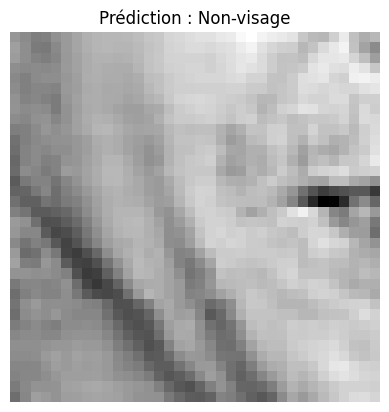

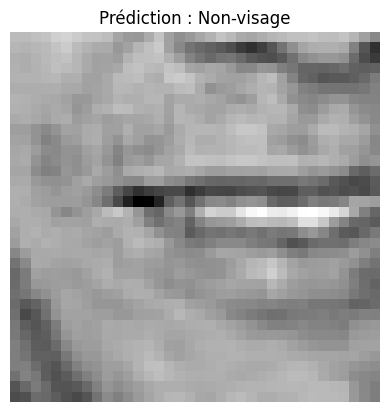

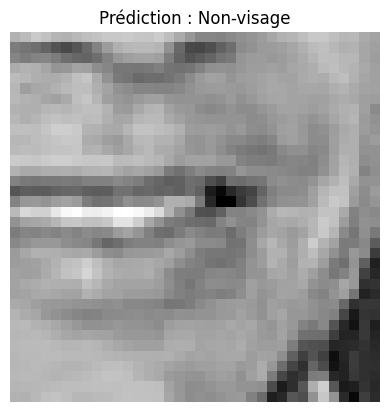

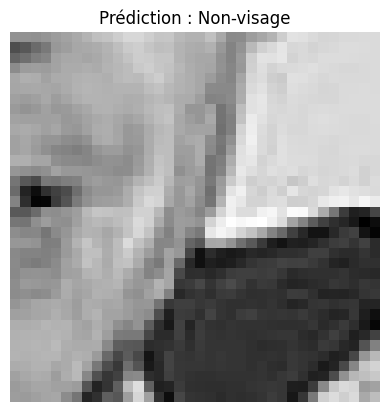

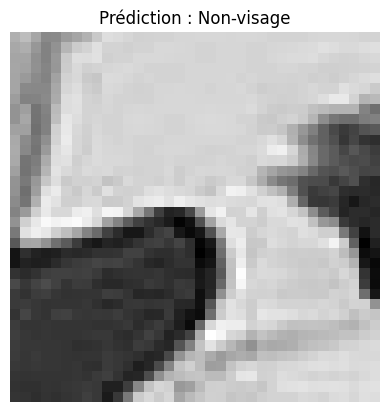

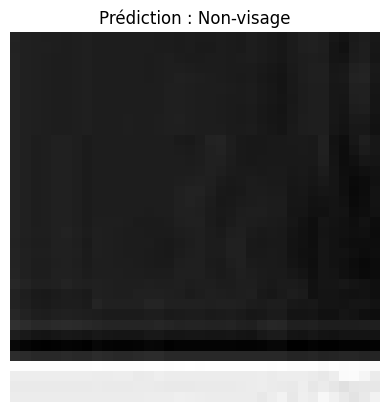

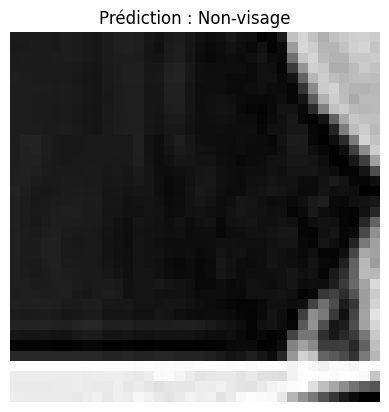

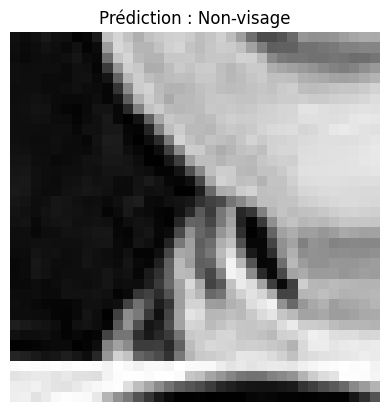

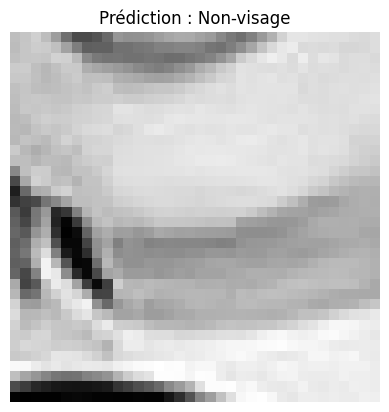

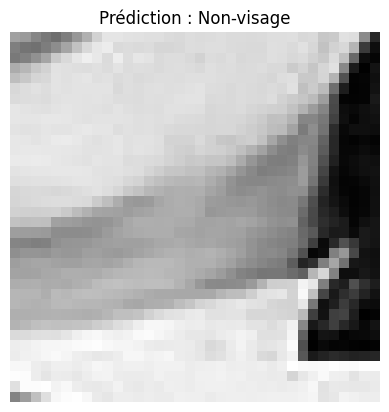

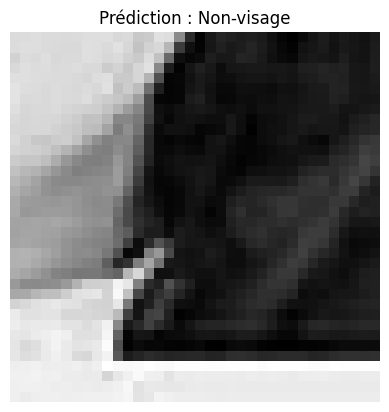

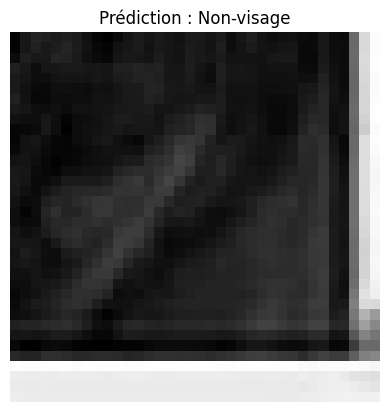

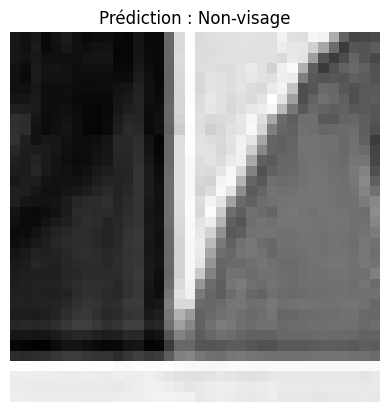

KeyboardInterrupt: 

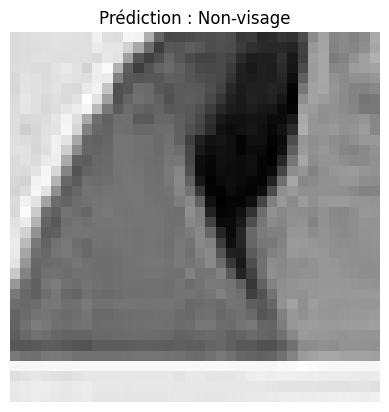

In [4]:
# Parcourir l'image avec la fenêtre coulissante
for y in range(0, img_height - window_size, int(window_size * (1 - overlap))):
    for x in range(0, img_width - window_size, int(window_size * (1 - overlap))):
        # Extraire la région de la fenêtre
        window = image_tensor[:, y:y+window_size, x:x+window_size].unsqueeze(0)  # Ajouter une dimension de lot

        # Faire la prédiction avec le modèle
        with torch.no_grad():
            output = model(window)
            _, predicted = torch.max(output.data, 1)


        # Convertir la prédiction en texte (1 pour visage, 0 pour non-visage)
        prediction_text = "Visage" if predicted.item() == 1 else "Non-visage"

        window_image = window.squeeze(0).numpy()  # Convertir le tenseur en une matrice NumPy
        # Afficher la fenêtre avec la prédiction
        plt.imshow(window_image[0], cmap='gray')  # Afficher l'image en niveaux de gris
        plt.title(f"Prédiction : {prediction_text}")
        plt.axis('off')
        display(plt.gcf())  # Afficher le graphique dans le notebook
        """
        if predicted.item() == 1:
            window_image = window.squeeze(0).numpy()  # Convertir le tenseur en une matrice NumPy
            # Afficher la fenêtre avec la prédiction
            plt.imshow(window_image[0], cmap='gray')  # Afficher l'image en niveaux de gris
            plt.title(f"Prédiction : Visage")
            plt.axis('off')
            display(plt.gcf())  # Afficher le graphique dans le notebook
        """
